In [ ]:
yf.download(tickers="",["close"])

data("differ")=data["close"].diff() - to make it stationary

In [23]:
import yfinance as yf
import pandas as pd

In [24]:
bitcoin=yf.Ticker("BTC-USD")
bitcoin_data= bitcoin.history(period="2y")
bitcoin_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-06,10167.216797,10353.927734,10056.885742,10280.351562,37071460174,0,0
2020-09-07,10280.998047,10399.153320,9916.493164,10369.563477,33703098409,0,0
2020-09-08,10369.306641,10414.775391,9945.110352,10131.516602,33430927462,0,0
2020-09-09,10134.151367,10350.542969,10017.250977,10242.347656,24128292755,0,0
2020-09-10,10242.330078,10503.912109,10238.135742,10363.138672,54406443211,0,0
...,...,...,...,...,...,...,...
2022-09-02,20126.072266,20401.568359,19814.765625,19969.771484,29123998928,0,0
2022-09-03,19969.718750,20037.009766,19698.355469,19832.087891,23613051457,0,0
2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,25245861652,0,0


In [26]:
bit_data=yf.download(tickers="BTC-USD")["Close"]
bit_df=pd.DataFrame(bit_data)
bit_df

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2022-09-02,19969.771484
2022-09-03,19832.087891
2022-09-04,19986.712891


In [29]:
bit_df.index=pd.to_datetime(bit_df.index)
bit_df

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2022-09-02,19969.771484
2022-09-03,19832.087891
2022-09-04,19986.712891


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Vithushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


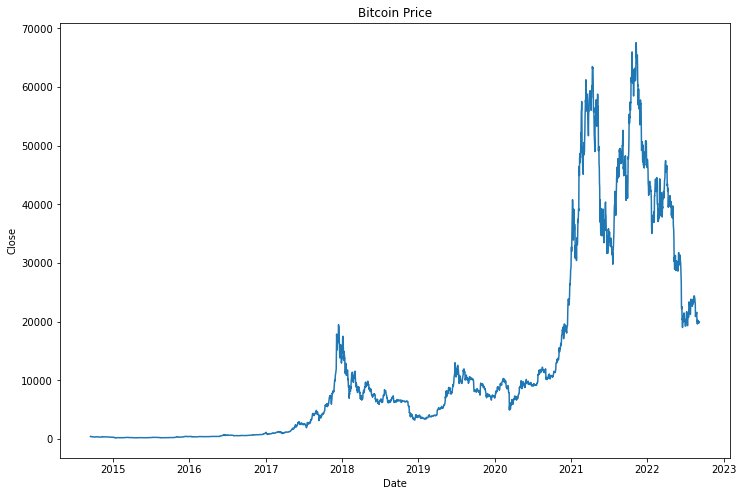

In [41]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.lineplot (bit_df.index,bit_df.Close)
plt.title('Bitcoin Price')
plt.show;


In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
result = adfuller(bit_df)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.665443614015314
n_lags: 0.4489991017832115
p-value: 0.4489991017832115
Critial Values:
   1%, -3.432620250421088
Critial Values:
   5%, -2.8625430431586545
Critial Values:
   10%, -2.567303948779845


In [44]:
adfuller(bit_df)

(-1.665443614015314,
 0.4489991017832115,
 28,
 2883,
 {'1%': -3.432620250421088,
  '5%': -2.8625430431586545,
  '10%': -2.567303948779845},
 46704.56180258502)

In [45]:
from statsmodels.tsa.stattools import kpss

In [46]:
kpss(bit_df)

C:\Users\Vithushan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(5.884378415490255,
 0.01,
 31,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})